# Exploring Demographic Factors of Substance Use

*Guiding Question: Which identity marker(s) can be used to model and/or predict an individual’s levels of drinking, smoking, and drug use?*

In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None # suppress warning for overwriting dataframe
# Load in data
df = pd.read_csv("profiles.csv")

### Clean, Process, & Explore Data

In [211]:
# Explore Column Values
cols = df.columns.tolist()

for col in cols:
    if col[:5] != 'essay':
        print(df[col].value_counts())
        print('\n')

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64


average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


mostly

In [212]:
# Check for nans

nan_cols = []

for col in cols:
    if df[col].isna().any():
        nan_cols.append(col)
        
print(nan_cols)

['body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'job', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks']


*Rows will be removed if the below column values are nans due to a lack of information and inability to assume a zero value:*
- body_type
- diet
- education
- ethnicity
- religion
- sign
- speaks


*The following columns will replace nans with zeros / nonvalues (no education, no job, etc.):*
- drinks, drugs, smokes 
- job
- offspring
- pets




In [213]:
# Remove Nans
print(f'before: {len(df)}')
df = df.dropna(subset = ['body_type','diet', 'education','ethnicity','religion','sign','speaks'])
print(f'after: {len(df)}')

before: 59946
after: 19657


In [214]:
# Replace Nans / Nonvalues
import re
df.drinks = df.drinks.fillna('not at all')
df.drugs = df.drugs.fillna('never')
df.smokes = df.smokes.fillna('no')
df.job = df.job.fillna('unemployed')
df.offspring = df.offspring.fillna('doesn&rsquo;t have kids')
for i in range(len(df)):
    df.offspring.iloc[i] = re.sub('&rsquo;','\'',df.offspring.iloc[i])
df.pets = df.pets.fillna('dislikes dogs and dislikes cats')
df = df[df.income >0]
for i in range(10):
    df[f'essay{i}'] = df[f'essay{i}'].fillna('')
df.status = df.status.replace('unknown', 'single')
print(df.offspring.value_counts())

doesn't have kids                          2688
doesn't have kids, but might want them      661
doesn't have kids, but wants them           484
doesn't want kids                           356
doesn't have kids, and doesn't want any     237
has kids                                    198
has a kid                                   173
has kids, but doesn't want more              72
has a kid, and might want more               60
has a kid, but doesn't want more             42
might want kids                              26
wants kids                                   26
has kids, and might want more                20
has a kid, and wants more                    16
has kids, and wants more                     10
Name: offspring, dtype: int64


In [215]:
# Check column values

for col in cols:
    if col[:5] != 'essay':
        print(df[col].value_counts())
        if df[col].isna().any():
            print(f'{col} still has nans')
        print('\n')


25    298
26    295
27    293
24    270
28    264
23    255
29    239
30    232
31    211
22    206
32    197
33    169
21    167
34    157
20    138
35    125
37    122
36    117
39    105
38    104
41     93
42     88
43     77
40     70
19     68
44     62
45     53
48     52
46     46
47     44
49     42
18     38
50     35
54     34
55     31
52     31
56     29
51     26
57     23
58     23
59     20
60     17
65     17
61     14
66     14
62     14
53     11
64     10
68      9
63      6
67      6
69      2
Name: age, dtype: int64


average           1356
athletic          1075
fit               1007
curvy              379
a little extra     370
thin               356
skinny             174
full figured       129
overweight          81
jacked              72
used up             61
rather not say       9
Name: body_type, dtype: int64


mostly anything        2559
strictly anything       709
anything                682
mostly vegetarian       470
mostly other            176
strict

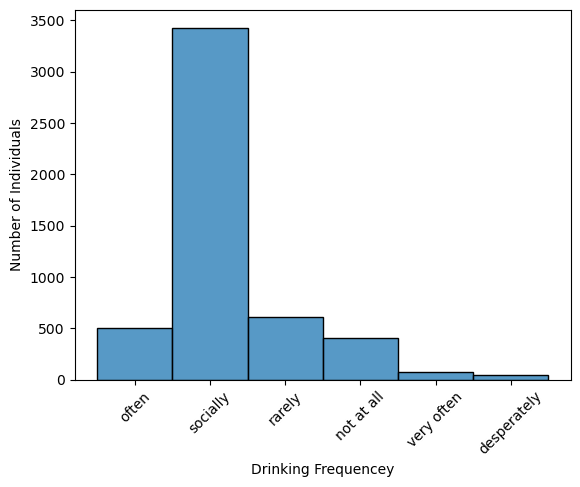

In [216]:
# Visualize the Data: Drinks

sns.histplot(data = df, x = 'drinks')
plt.xticks(rotation = 45)
plt.xlabel('Drinking Frequencey')
plt.ylabel('Number of Individuals')
plt.show()

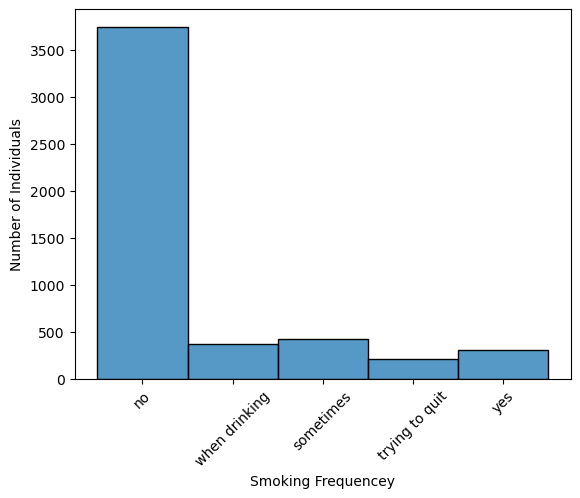

In [217]:
# Visualize the Data: Smokes

sns.histplot(data = df, x = 'smokes')
plt.xticks(rotation = 45)
plt.xlabel('Smoking Frequencey')
plt.ylabel('Number of Individuals')
plt.show()

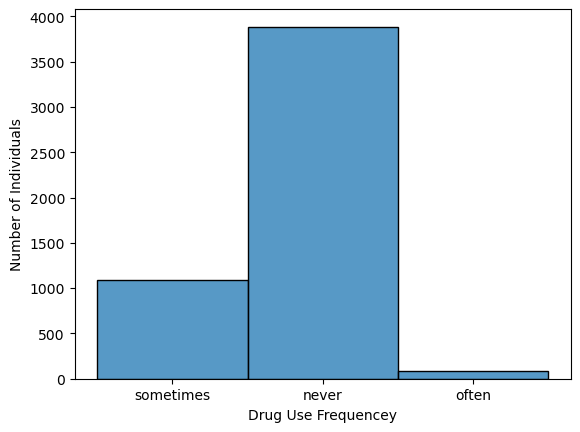

In [218]:
# Visualize the Data: Drugs

sns.histplot(data = df, x = 'drugs')
plt.xlabel('Drug Use Frequencey')
plt.ylabel('Number of Individuals')
plt.show()

### Augmenting Data

After examining the distribution of various levels of substance use, data will be processed and augmented for normalization purposes, and so categorical features can be examined using machine learning algorithms.

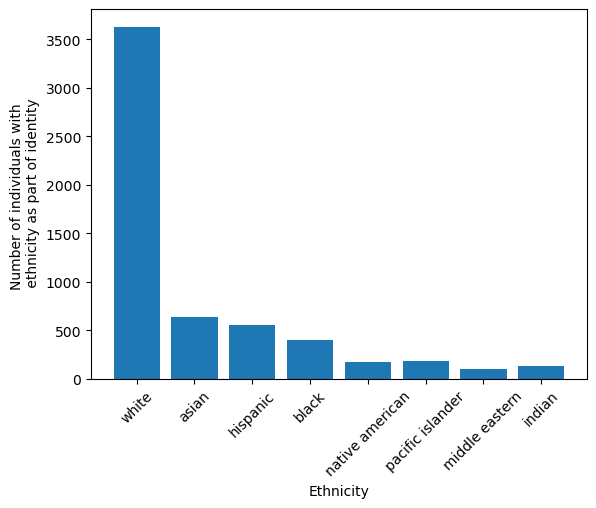

In [219]:
# Ethnicity

# drop rows that contain 'other' - this is not a helpful datapoint
# (though this study acknowledges that there are more ethnicities than those presented here)
df = df[df.ethnicity != 'other']

white_counts = []
asian_counts = []
hispanic_latin_counts = []
black_counts = []
native_american_counts = []
pacific_islander_counts = []
middle_eastern_counts = []
indian_counts = []

base_ethnics = ['white','asian','hispanic','black','native american','pacific islander','middle eastern', 'indian']
ethnicities = df.ethnicity.value_counts().index.tolist()
new_ethnicity = []

for person in df.ethnicity:
    person = str(person)
    if 'white' in person:
        white_counts.append(1)
    else:
        white_counts.append(0)
    if 'asian' in person:
        asian_counts.append(1)
    else:
        asian_counts.append(0)
    if 'hispanic' in person:
        hispanic_latin_counts.append(1)
    else:
        hispanic_latin_counts.append(0)
    if 'black' in person:
        black_counts.append(1)
    else:
        black_counts.append(0)
    if 'native american' in person:
        native_american_counts.append(1)
    else:        
        native_american_counts.append(0)
    if 'pacific islander' in person:
        pacific_islander_counts.append(1)
    else:
        pacific_islander_counts.append(0)
    if 'middle eastern' in person:
        middle_eastern_counts.append(1)
    else:
        middle_eastern_counts.append(0)
    if 'indian' in person:
        indian_counts.append(1)
    else:
        indian_counts.append(0)

counts = [sum(white_counts),sum(asian_counts),sum(hispanic_latin_counts),sum(black_counts),
          sum(native_american_counts),sum(pacific_islander_counts),sum(middle_eastern_counts),sum(indian_counts)]

df['white_counts'] = white_counts
df['asian_counts'] = asian_counts
df['hispanic_latin_counts'] = hispanic_latin_counts
df['black_counts'] = black_counts
df['native_american_counts'] = native_american_counts
df['pacific_islander_counts'] = pacific_islander_counts
df['middle_eastern_counts'] = middle_eastern_counts
df['indian_counts'] = indian_counts

plt.bar(base_ethnics, counts)
plt.xlabel("Ethnicity")
plt.ylabel("Number of individuals with \n ethnicity as part of identity")
plt.xticks(rotation = 45)
plt.show()

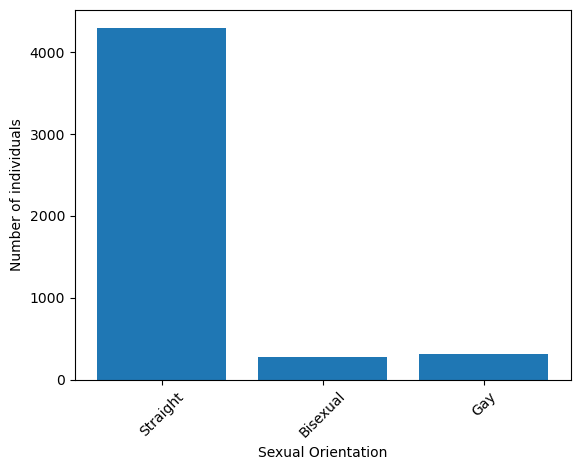

In [220]:
# Orientation

straight_counts = []
bisexual_counts = []
gay_counts = []

for person in df.orientation:
    person = str(person)
    if person =='straight':
        straight_counts.append(1)
        bisexual_counts.append(0)
        gay_counts.append(0)
    elif person =='bisexual':
        straight_counts.append(0)
        bisexual_counts.append(1)
        gay_counts.append(0)
    elif person =='gay':
        straight_counts.append(0)
        bisexual_counts.append(0)
        gay_counts.append(1)

        
df['straight_counts'] = straight_counts       
df['bisexual_counts'] = bisexual_counts
df['gay_counts'] = gay_counts

plt.bar(['Straight','Bisexual','Gay'], [sum(straight_counts),sum(bisexual_counts),sum(gay_counts)])
plt.xlabel("Sexual Orientation")
plt.ylabel("Number of individuals")
plt.xticks(rotation = 45)
plt.show()

In [221]:
# Offspring 

parent = []

for person in df.offspring:
    person = str(person)
    if 'has' in person:
        parent.append(1)
    else:
        parent.append(0)

df['parent'] = parent       

print("There are "+str(sum(parent))+" parents and "+str(len(parent)-sum(parent))+" non-parents in the dataset.")

There are 571 parents and 4324 non-parents in the dataset.


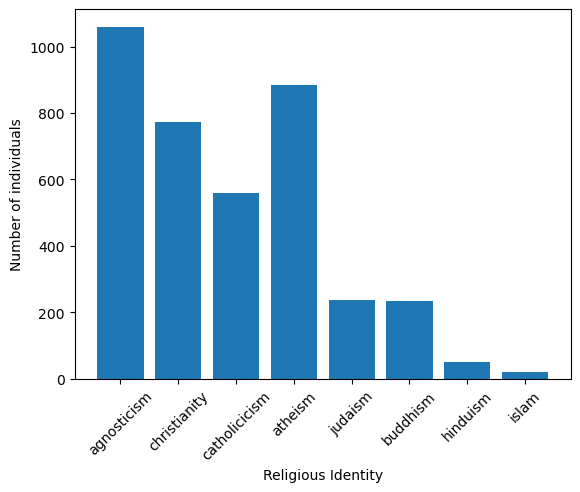

In [222]:
# Religion

base_religs = ['agnosticism','christianity','catholicicism','atheism','judaism','buddhism','hinduism','islam']
agn_counts = []
chris_counts = []
cath_counts = []
ath_counts = []
jud_counts = []
bud_counts = []
hind_counts = []
isl_counts = []

for person in df.religion:
    if 'agnosticism' in person:
        agn_counts.append(1)
    else:
        agn_counts.append(0)
    if 'christianity' in person:
        chris_counts.append(1)
    else:
        chris_counts.append(0)
    if 'catholicism' in person:
        cath_counts.append(1)
    else:
        cath_counts.append(0)
    if 'atheism' in person:
        ath_counts.append(1)
    else:
        ath_counts.append(0)
    if 'judaism' in person:
        jud_counts.append(1)
    else:
        jud_counts.append(0)
    if 'buddhism' in person:
        bud_counts.append(1)
    else:
        bud_counts.append(0)
    if 'hinduism' in person:
        hind_counts.append(1)
    else:
        hind_counts.append(0)
    if 'islam' in person:
        isl_counts.append(1)
    else:
        isl_counts.append(0)

        
df['agn_counts'] = agn_counts
df['chris_counts'] = chris_counts
df['cath_counts'] = cath_counts
df['ath_counts'] = ath_counts
df['jud_counts'] = jud_counts
df['bud_counts'] = bud_counts
df['hind_counts'] = hind_counts
df['isl_counts'] = isl_counts
        
plt.bar(base_religs, [sum(agn_counts),sum(chris_counts),sum(cath_counts),sum(ath_counts),sum(jud_counts),
                      sum(bud_counts),sum(hind_counts),sum(isl_counts)])
plt.xlabel("Religious Identity")
plt.ylabel("Number of individuals")
plt.xticks(rotation = 45)
plt.show()

In [223]:
# Sex

sex_codes = []
male_counts = 0
fem_counts = 0
for person in df.sex:
    if person =='m':
        sex_codes.append(0)
        male_counts+=1
    else:
        sex_codes.append(1)
        fem_counts +=1

df['sex_codes'] = sex_codes

print(f'There are {male_counts} males and {fem_counts} females in the dataset.')

There are 3468 males and 1427 females in the dataset.


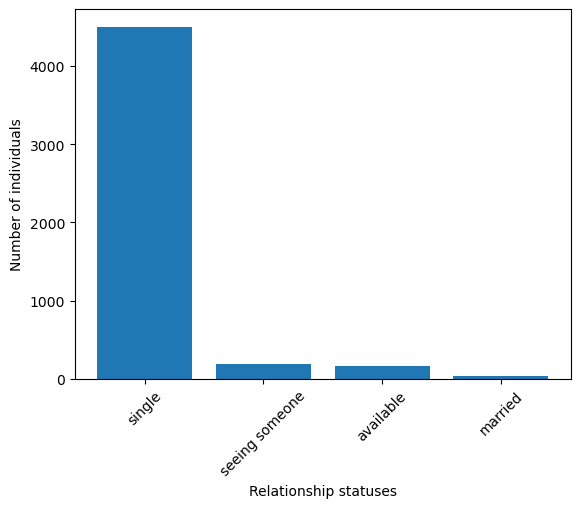

In [224]:
# Relationship Status

statuses = df.status.value_counts().index.tolist()
single_counts = []
available_counts = []
seeing_someone_counts = []
married_counts = []

for person in df.status:
    person = str(person)
    if person == 'single':
        single_counts.append(1)
    else:
        single_counts.append(0)
    if person == 'available':
        available_counts.append(1)
    else:
        available_counts.append(0)
    if person == 'seeing someone':
        seeing_someone_counts.append(1)
    else:
        seeing_someone_counts.append(0)
    if person == 'married':
        married_counts.append(1)
    else:
        married_counts.append(0)

counts = []
for i in df.status.value_counts():
    counts.append(i)

df['single_counts'] = single_counts
df['available_counts'] = available_counts
df['seeing_someone_counts'] = seeing_someone_counts
df['married_counts'] = married_counts
    
plt.bar(statuses,counts)
plt.xlabel('Relationship statuses')
plt.ylabel('Number of individuals')
plt.xticks(rotation = 45)
plt.show()

/var/folders/bz/7kz8p41n0rnft5_b5tkwgdlr0000gn/T/ipykernel_13348/2104497939.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


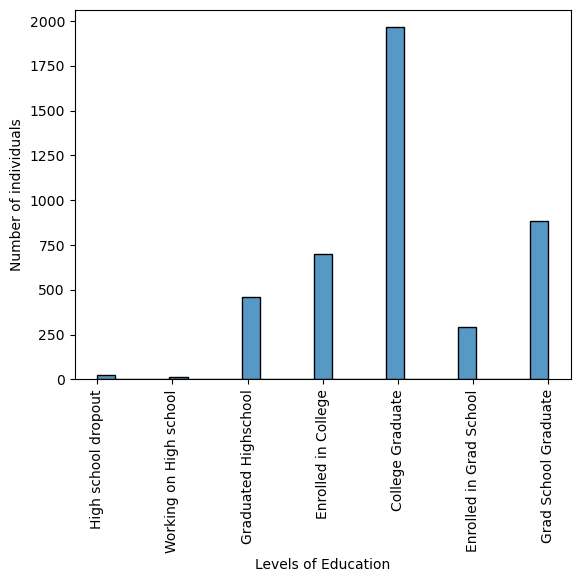

In [225]:
# Augmenting Data: Education

ed_codes = []

advanced_degrees = ["masters",'ph.d','space camp','law school','med school']
index = 0
adv_degrees = 0
for person in df.education:
    
    person = str(person)
    
    adv_degree = False
    
    for degree in advanced_degrees:
        if degree in person:
            adv_degree = True
            
    if adv_degree == True:
        for degree in advanced_degrees:
            if degree in person:
                if 'graduated' in person: # Grad school graduate = 6 
                    ed_codes.append(6)
                    adv_degrees+=1
                elif 'working on' in person: # Enrolled in grad school = 5
                    ed_codes.append(5)
                elif 'dropped out' in person: # Grad school drop out = College Grad = 4
                    ed_codes.append(4)
                else:
                    ed_codes.append(np.nan)
        
    elif 'college/university' in person:
        if 'graduated' in person:
            ed_codes.append(4) # College grad = 4
        elif 'working on' in person:
            ed_codes.append(3) # Enrolled in College = 3
        elif 'dropped out' in person:
            ed_codes.append(2) # College Dropout = High school graduate = 2
        else:
            ed_codes.append(np.nan) 
    elif 'high school' in person:
        if 'graduated' in person:
            ed_codes.append(2) # High school grad = 2
        elif 'working on' in person:
            ed_codes.append(1) # Working on High school = 1
        elif 'dropped out' in person:
            ed_codes.append(0) # High school dropout = 0
        else:
            ed_codes.append(np.nan)
    else:
        ed_codes.append(np.nan)
    index+=1
    
import matplotlib.ticker as mticker
label_format = '{:,.0f}'
df['ed_codes'] = ed_codes
ax = sns.histplot(ed_codes)
plt.xlabel('Levels of Education')
plt.ylabel('Number of individuals')
xlabels = ['','High school dropout', 'Working on High school', 'Graduated Highschool', 'Enrolled in College', 
            'College Graduate', 'Enrolled in Grad School', 'Grad School Graduate']
ax.set_xticklabels(xlabels, rotation = 90)
plt.show()

In [226]:
# The following function will print a percentage of individuals that fall into a certain category; for each value
# in the value count the percent will represent that band of individuals who fall into both the discrete value 
# in the count and the category of the new df

def perc_print(new_df,old_df,desc):
    
    # initialize list of columns and empty dictionary 
    cols = new_df.columns.tolist() 
    essays = [f'essay{i}'for i in range(10)]
    cols = [col for col in cols if col not in essays and col != 'last_online'] # select salient columns
    perc_dict = {}
    
    for col in cols:
        # create new values count list from new data frame
        news = new_df[col].value_counts().values 
        new_cats = new_df[col].value_counts().index.tolist()
        itots = old_df[col].value_counts().values.tolist() # initial total values 
        itot_cats = df[col].value_counts().index.tolist() # initial total values 
        tots = []
        tot_cats = []
        percents = []
        
        # ensure only the new categories' values are taken from the original df's value counts
        for cat in new_cats:
            tot_cat_i = itot_cats.index(cat)
            tot_cats.append(cat)
            tots.append(itots[tot_cat_i])
            
        # calculate percents of individuals that meet criterium, append greater than 10%
        for i in range(len(news)):
                per = news[i]/tots[i]
                if per > 0.10:
                    percents.append(f'{new_cats[i]}:  {round(per*100,2)}% (out of {tots[i]})')
        
        perc_dict[col] = percents
    
    print(f"Significant Percentages (>10%) of {desc}:\n")
    for col in perc_dict.keys():
        print(f"{col}:\n")
        for i in range(len(perc_dict[col])):
            print(perc_dict[col][i])
        print('\n\n')


In [227]:
# Explore Moderate-Heavy Drinking Profiles

drink_df = df[(df['drinks'] == 'very often') | (df['drinks'] == 'often') | (df['drinks'] == 'desperately')]

perc_print(drink_df, df, 'people who drink very often-desperately')


Significant Percentages (>10%) of people who drink very often-desperately:

age:

25:  18.75% (out of 288)
27:  15.96% (out of 282)
24:  15.38% (out of 260)
23:  15.85% (out of 246)
26:  12.63% (out of 285)
22:  17.5% (out of 200)
29:  13.6% (out of 228)
31:  15.12% (out of 205)
32:  16.67% (out of 186)
28:  11.58% (out of 259)
30:  12.61% (out of 222)
33:  16.23% (out of 154)
21:  14.81% (out of 162)
20:  15.04% (out of 133)
34:  11.76% (out of 153)
35:  12.2% (out of 123)
37:  12.07% (out of 116)
59:  10.53% (out of 19)



body_type:

average:  12.3% (out of 1317)
fit:  10.76% (out of 976)
thin:  17.9% (out of 352)
skinny:  22.49% (out of 169)
curvy:  10.56% (out of 360)
used up:  40.35% (out of 57)
full figured:  17.19% (out of 128)
jacked:  26.47% (out of 68)
overweight:  15.38% (out of 78)
rather not say:  22.22% (out of 9)



diet:

mostly anything:  10.91% (out of 2475)
strictly anything:  18.05% (out of 687)
anything:  12.72% (out of 668)
strictly vegetarian:  19.17% (out of 12

In [228]:
# Explore Moderate-Heavy Smoking Profiles

smoke_df = df[(df['smokes'] == 'sometimes') | (df['smokes'] == 'yes') | (df['smokes'] == 'trying to quit')]

perc_print(smoke_df, df, 'people who smoke sometimes-trying to quit')

Significant Percentages (>10%) of people who smoke sometimes-trying to quit:

age:

22:  35.0% (out of 200)
25:  23.61% (out of 288)
23:  27.24% (out of 246)
24:  25.0% (out of 260)
21:  33.95% (out of 162)
26:  18.25% (out of 285)
27:  17.38% (out of 282)
20:  33.08% (out of 133)
28:  16.22% (out of 259)
29:  17.98% (out of 228)
31:  20.0% (out of 205)
32:  21.51% (out of 186)
30:  17.12% (out of 222)
19:  39.39% (out of 66)
33:  16.88% (out of 154)
34:  16.34% (out of 153)
37:  14.66% (out of 116)
18:  42.11% (out of 38)
36:  13.51% (out of 111)
40:  16.42% (out of 67)
44:  16.13% (out of 62)
42:  10.59% (out of 85)
49:  15.0% (out of 40)
52:  19.35% (out of 31)
55:  16.67% (out of 30)
56:  14.81% (out of 27)
51:  11.54% (out of 26)



body_type:

average:  20.43% (out of 1317)
fit:  14.75% (out of 976)
athletic:  13.12% (out of 1021)
thin:  24.43% (out of 352)
a little extra:  20.83% (out of 360)
curvy:  18.89% (out of 360)
skinny:  37.28% (out of 169)
full figured:  22.66% (out of 

In [229]:
# Explore Moderate-Heavy Drug Use Profiles

drug_df = df[(df['drugs'] == 'sometimes') | (df['drugs'] == 'often')]

perc_print(drug_df, df, 'people who use drugs sometimes-often')

Significant Percentages (>10%) of people who use drugs sometimes-often:

age:

23:  35.77% (out of 246)
25:  30.21% (out of 288)
27:  26.6% (out of 282)
24:  27.69% (out of 260)
26:  23.86% (out of 285)
22:  31.5% (out of 200)
30:  27.03% (out of 222)
21:  36.42% (out of 162)
28:  22.39% (out of 259)
29:  25.0% (out of 228)
31:  25.85% (out of 205)
20:  37.59% (out of 133)
32:  20.97% (out of 186)
34:  20.26% (out of 153)
33:  18.18% (out of 154)
37:  20.69% (out of 116)
35:  17.89% (out of 123)
38:  20.59% (out of 102)
36:  18.02% (out of 111)
18:  47.37% (out of 38)
41:  19.78% (out of 91)
39:  16.5% (out of 103)
19:  25.76% (out of 66)
42:  14.12% (out of 85)
43:  16.0% (out of 75)
44:  14.52% (out of 62)
40:  11.94% (out of 67)
54:  17.65% (out of 34)
55:  16.67% (out of 30)
65:  25.0% (out of 16)
57:  13.04% (out of 23)
62:  21.43% (out of 14)
56:  11.11% (out of 27)
51:  11.54% (out of 26)
59:  15.79% (out of 19)
53:  18.18% (out of 11)
66:  15.38% (out of 13)
60:  11.76% (out of

In [230]:
# Augmenting the Data: Drinking, smoking, drugs

drink_map = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
drink_codes = df.drinks.map(drink_map)
df.drinks = drink_codes

smoke_map = {'no':0,'when drinking':1,'sometimes':2,'yes':3,'trying to quit':4}
smoke_codes = df.smokes.map(smoke_map)
df.smokes = smoke_codes

drug_map = {'never':0,'sometimes':1,'often':2}
drug_codes = df.drugs.map(drug_map)
df.drugs = drug_codes

for col in ['drinks','smokes','drugs']:
    print(df[col].value_counts())
    if df[col].isna().any():
        print(f'{col} has a nan')

2    3310
1     583
3     493
0     395
4      72
5      42
Name: drinks, dtype: int64
0    3621
2     418
1     358
3     294
4     204
Name: smokes, dtype: int64
0    3746
1    1062
2      87
Name: drugs, dtype: int64


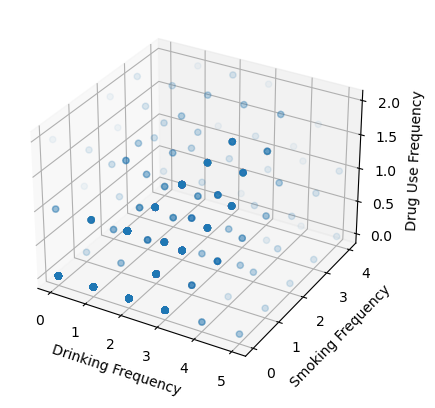

In [232]:
# Visualize Augmented Substance Data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df.drinks
y = df.smokes
z = df.drugs

ax.set_xlabel("Drinking Frequency")
ax.set_ylabel("Smoking Frequency")
ax.set_zlabel("Drug Use Frequency")

ax.scatter(x, y, z, alpha = 0.05)

plt.show()

In [233]:
features = df[['income','white_counts','asian_counts',
               'hispanic_latin_counts', 'black_counts',
               'native_american_counts','pacific_islander_counts',
               'middle_eastern_counts','indian_counts','straight_counts',
               'bisexual_counts','gay_counts','ed_codes','single_counts',
               'available_counts','seeing_someone_counts','married_counts',
               'sex_codes','parent','agn_counts','chris_counts',
               'cath_counts','ath_counts','jud_counts','bud_counts',
               'hind_counts','isl_counts']]
labels = list(zip(df.drinks, df.smokes, df.drugs))

In [234]:
# Scale Data

from sklearn import preprocessing

x = features.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled, columns = features.columns)
features = features.replace([np.inf, -np.inf, np.nan],0)

### KMeans++ Clustering

In [235]:
from sklearn.cluster import KMeans
km = KMeans(init = 'k-means++', n_clusters = 4).fit(features.values)
df['cluster'] = km.predict(features.values)
print(df.cluster.value_counts())

0    1916
3    1069
1    1050
2     860
Name: cluster, dtype: int64


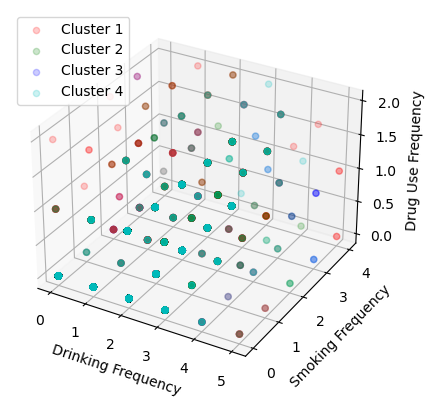

In [259]:
# Visualize k means clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]

ax.scatter(df0.drinks, df0.smokes, df0.drugs, c = 'r',alpha = 0.2)
ax.scatter(df1.drinks, df1.smokes, df1.drugs, c = 'g',alpha = 0.2)
ax.scatter(df2.drinks, df2.smokes, df2.drugs, c = 'b',alpha = 0.2)
ax.scatter(df3.drinks, df3.smokes, df3.drugs, c = 'c',alpha = 0.2)
ax.set_xlabel("Drinking Frequency")
ax.set_ylabel("Smoking Frequency")
ax.set_zlabel("Drug Use Frequency")
ax.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], loc = 'upper left')
plt.show()

In [252]:
# Predicting clusters 

# Features columns: income, white_counts, asian_counts, hispanic_latin_counts, black_counts, native_american_counts, 
# pacific_islander_counts, middle_eastern_counts, indian_counts, straight_counts, bisexual_counts, gay_counts,
# ed_codes, single_counts, available_counts, seeing_someone_counts, married_counts, sex_codes, parent, agn_counts,
# chris_counts, cath_counts, ath_counts, jud_counts, bud_counts, hind_counts, isl_counts

ex1 = [[2000, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 0 , 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]
ex1_scaled = min_max_scaler.fit_transform(ex1)
res = km.predict(ex1_scaled)
print(f"Predicted cluster: {res[0]}")
print('\n')
for col in features.columns.tolist():
    print(f'{col} average: {round(df2[col].mean(),2)}')
print('\n')
for col in ['drinks','smokes','drugs']:
    print(f'{col} average: {round(df2[col].mean(),1)}')


Predicted cluster: 3


income average: 87651.16
white_counts average: 1.0
asian_counts average: 0.05
hispanic_latin_counts average: 0.06
black_counts average: 0.04
native_american_counts average: 0.04
pacific_islander_counts average: 0.02
middle_eastern_counts average: 0.01
indian_counts average: 0.01
straight_counts average: 0.8
bisexual_counts average: 0.15
gay_counts average: 0.05
ed_codes average: 4.16
single_counts average: 0.9
available_counts average: 0.03
seeing_someone_counts average: 0.06
married_counts average: 0.01
sex_codes average: 1.0
parent average: 0.18
agn_counts average: 0.0
chris_counts average: 0.2
cath_counts average: 0.12
ath_counts average: 0.21
jud_counts average: 0.1
bud_counts average: 0.06
hind_counts average: 0.0
isl_counts average: 0.0


drinks average: 1.8
smokes average: 0.5
drugs average: 0.2


### Support Vector Regression

In [ ]:
# Split Data into Training & Testing Sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels)

x_train = x_train.replace([np.inf, -np.inf, np.nan],0)

In [ ]:
# Regression Techniques - Supported Vector Machine - Drinking
from sklearn.svm import SVC

max_acc = 0
max_g = 0
max_c = 0

training_data, validation_data, training_labels, validation_labels = train_test_split(features, drink_labels, train_size = 0.8, test_size = 0.2)

for c in range(1,101,10):
    for g in range(1,20):
        g = g/10
        classifier = SVC(kernel = 'rbf', gamma = g, C = c)
        classifier.fit(training_data,training_labels)
        score = classifier.score(validation_data,validation_labels)
      
        if score>max_acc:
            max_acc = score
            max_g = g
            max_c = c

print('The maximum accuracy of the drinking SVM is '+str(max_acc*100)+'% when g = '+str(max_g)+' and when c = '+str(max_c))

############

# Supported Vector Machine - Smoking
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

max_acc = 0
max_g = 0
max_c = 0

training_data, validation_data, training_labels, validation_labels = train_test_split(features, smoke_labels, train_size = 0.8, test_size = 0.2)

for c in range(1,101,10):
    for g in range(1,20):
        g = g/10
        classifier = SVC(kernel = 'rbf', gamma = g, C = c)
        classifier.fit(training_data,training_labels)
        score = classifier.score(validation_data,validation_labels)
      
        if score>max_acc:
            max_acc = score
            max_g = g
            max_c = c

print('The maximum accuracy of the smoking SVM is '+str(max_acc*100)+'% when g = '+str(max_g)+' and when c = '+str(max_c))

############

# Supported Vector Machine - Drugs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

max_acc = 0
max_g = 0
max_c = 0

training_data, validation_data, training_labels, validation_labels = train_test_split(features, drug_labels, train_size = 0.8, test_size = 0.2)

for c in range(1,101,10):
    for g in range(1,20):
        g = g/10
        classifier = SVC(kernel = 'rbf', gamma = g, C = c)
        classifier.fit(training_data,training_labels)
        score = classifier.score(validation_data,validation_labels)
     
        if score>max_acc:
            max_acc = score
            max_g = g
            max_c = c

print('The maximum accuracy of the drug use SVM is '+str(max_acc*100)+'% when g = '+str(max_g)+' and when c = '+str(max_c))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
